<a href="https://colab.research.google.com/github/AnthonyCampos123/SURP-Neural-Network-Model-Distillation-and-Pruning-for-Pattern-Recognition-and-Predictions/blob/main/PyTorch_Neural_Network_3_SURP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch: 0 and loss: 1.1319317817687988
Epoch: 10 and loss: 0.9960405826568604
Epoch: 20 and loss: 0.9245553612709045
Epoch: 30 and loss: 0.9025648236274719
Epoch: 40 and loss: 0.9010205864906311
Epoch: 50 and loss: 0.8948792815208435
Epoch: 60 and loss: 0.892646074295044
Epoch: 70 and loss: 0.8897403478622437
Epoch: 80 and loss: 0.8872989416122437
Epoch: 90 and loss: 0.8854109048843384
Epoch: 100 and loss: 0.8840832710266113
Epoch: 110 and loss: 0.8832560777664185
Epoch: 120 and loss: 0.8825704455375671
Epoch: 130 and loss: 0.8820206522941589
Epoch: 140 and loss: 0.8814038038253784
Epoch: 150 and loss: 0.8808680772781372
Epoch: 160 and loss: 0.8803351521492004
Epoch: 170 and loss: 0.8800214529037476
Epoch: 180 and loss: 0.8792147636413574
Epoch: 190 and loss: 0.8789308071136475
Epoch: 200 and loss: 0.8773607611656189
Epoch: 210 and loss: 0.8753741979598999
Epoch: 220 and loss: 0.873211145401001
Epoch: 230 and loss: 0.8705659508705139
Epoch: 240 and loss: 0.8686341047286987
Epoch: 250 an

Model(
  (fc1): Linear(in_features=1, out_features=101, bias=True)
  (fc2): Linear(in_features=101, out_features=121, bias=True)
  (out): Linear(in_features=121, out_features=3, bias=True)
)

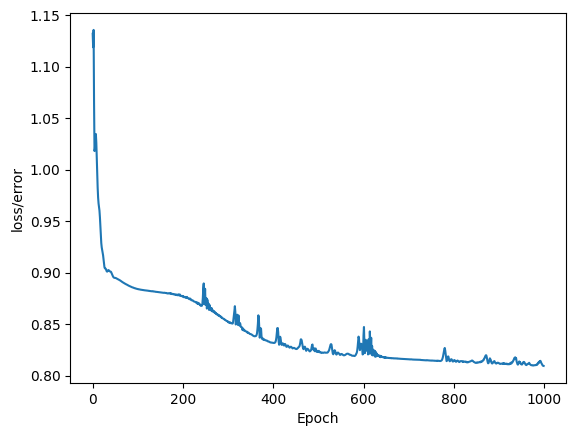

In [ ]:
import torch
import torch.nn as nn
# import numpy as np
import torch.nn.functional as F # helps move data forward in the function

# creating a model class that inherits nn.module
class Model(nn.Module):
  # input layer - 1 feature (gas price) ->
  # hidden layer1 (some number of neurons) ->
  # H2 (n) -> output (3 classes of inflation categorization)
  def __init__(self, in_features=1, h1=101, h2=121, out_features=3):
    super().__init__() # instantiates nn.Module
    self.fc1 = nn.Linear(in_features, h1) # input -> h1
    self.fc2 = nn.Linear(h1, h2) # h1 -> h2
    self.out = nn.Linear(h2, out_features) # h2 -> output

  def forward(self, x):
    # rectified linear unit
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

# manual seed for randomization
torch.manual_seed(47)

# create an instance of model
model = Model()

# to load in data
import pandas as pd
# to create chart
import matplotlib.pyplot as plt
%matplotlib inline

# loading in data / iris dataset
url = 'https://raw.githubusercontent.com/AnthonyCampos123/Gas-Price-v.-Inflation-Categorization-Training-Dataset/main/Gas%20Price%20v.%20Inflation%20Categorization%20Dataset%20-%20Sheet1.csv'
my_df = pd.read_csv(url)
# dataframe

# last column changed from strings to nums
# 0 = low (<2.0%) level of inflation
# 1 = middle (2% or greater) level of inflation
# 2 = high level (4% or greater) of inflation

my_df['Inflation Categorization'] = my_df['Inflation Categorization'].replace('lo', 0)
my_df['Inflation Categorization'] = my_df['Inflation Categorization'].replace('mid', 1)
my_df['Inflation Categorization'] = my_df['Inflation Categorization'].replace('hi', 2)


# train test split: set X=input, y=output
X = my_df.drop('Inflation Categorization', axis=1) # drop column
y = my_df['Inflation Categorization']

# convert to numpy arrays
X = X.values
y = y.values

# train model
from sklearn.model_selection import train_test_split

# train test split, test size = 20%, train size = 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=47)

# ensure y is of integer type
y = y.astype(int)

# convert X features (numpy arrays) to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# set the crierion of model to meansure the error (how far predictions
# are from the model)
criterion = nn.CrossEntropyLoss()

# choose Adam Optimizer, lr = learning rate (if error is not minimized after
# a large number of iterations (epochs), lower learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# train the model
# epochs (one iteration through all the training data in network)
epochs = 1000
losses = []
for i in range(epochs):
  # go forward and get a prediction
  y_pred = model.forward(X_train) # get predicted results

  # measure the loss/error
  loss = criterion(y_pred, y_train) # predicted values vs the y_train


  # keep track of losses, will help determine accuracy
  losses.append(loss.detach().numpy())

  # print every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # back propagation : take error rate of forward propogation and feed it back
  # through the network to tweak weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

# evaluate model on test data set (validate model on test set)
with torch.no_grad(): # turn off back propagation, not necessary here
  y_eval = model.forward(X_test) # X_test features from test, y_eval = predictions
  loss = criterion(y_eval, y_test) # find loss/error

# check correct
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
      y_val = model.forward(data)

      if y_test[i] == 0:
        x = 'lo'
      elif y_test[i] == 1:
        x = 'mid'
      else:
        x = 'hi'

      #type of diamond classification the neural network predicts
      print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t  {y_val.argmax().item()}')

      # if test matches prediction
      if y_val.argmax().item() == y_test[i]:
        correct += 1

print(f'Correct: {correct}')

test_classify_inflation_1 = torch.tensor([2.326])

# prediction is the index that is the greatest
# ex. 0 = lo, 1 = mid, 2 = hi, ppeduct
with torch.no_grad():
  print(model(test_classify_inflation_1))


test_classify_inflation_2 = torch.tensor([1.721])

with torch.no_grad():
  print(model(test_classify_inflation_2))

# save neural network model
torch.save(model.state_dict(), 'neural_network_3.pt') # save weights and biases for the model

# load the model
new_model = Model()
new_model.load_state_dict(torch.load('neural_network_3.pt'))

# ensure model is loaded correctly
new_model.eval()




















